# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Seviko Attalarik P.H
- **Email:** attalarik.handoko@gmail.com
- **ID Dicoding:** seviko

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara tingkat O3 dengan perubahan suhu di setiap stasiun pengamatan?
- Bagaimana tren bulanan dari tingkat polutan CO udara di setiap stasiun?

## Import Semua Packages/Library yang Digunakan

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

## Data Wrangling

### Gathering Data
Karena semua data memiliki nama kolom yang sama dan setiap csv yang membedakan hanya kotanya saja, maka semua csv disatukan menjadi satu data besar dengan menghilangkan kolom 'No' karena tidak digunakan.

In [3]:
data = os.listdir('data')

final_df = pd.DataFrame()

for file in data:
    temp = pd.read_csv(f'data/{file}')
    final_df = pd.concat([final_df, temp], ignore_index=True)

final_df.drop(columns=['No'], inplace=True)
final_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
1. **No**: Nomor urut pengamatan yang digunakan sebagai indeks data (dihapus karena tidak dibutuhkan).
2. **year**: Tahun pengambilan data kualitas udara.
3. **month**: Bulan pengambilan data kualitas udara.
4. **day**: Tanggal pengambilan data kualitas udara.
5. **hour**: Jam pengambilan data kualitas udara, menunjukkan waktu spesifik dalam satu hari.
6. **PM2.5**: Konsentrasi partikel udara halus berukuran 2.5 mikron atau lebih kecil, yang dapat masuk ke paru-paru dan mempengaruhi kesehatan, diukur dalam µg/m³.
7. **PM10**: Konsentrasi partikel udara yang berukuran hingga 10 mikron, yang juga berdampak pada kesehatan pernapasan, diukur dalam µg/m³.
8. **SO2**: Konsentrasi sulfur dioksida di udara, polutan gas yang dapat menyebabkan iritasi saluran pernapasan dan hujan asam, diukur dalam µg/m³.
9. **NO2**: Konsentrasi nitrogen dioksida di udara, yang berasal dari pembakaran bahan bakar fosil dan dapat merusak saluran pernapasan, diukur dalam µg/m³.
10. **CO**: Konsentrasi karbon monoksida di udara, gas beracun yang berasal dari pembakaran tidak sempurna, diukur dalam µg/m³.
11. **O3**: Konsentrasi ozon di permukaan tanah, polutan yang dapat menyebabkan masalah pernapasan jika berada dalam jumlah berlebih, diukur dalam µg/m³.
12. **TEMP**: Suhu udara pada saat pengambilan data, diukur dalam derajat Celsius.
13. **PRES**: Tekanan udara atmosfer pada saat pengambilan data, diukur dalam hektopascal (hPa).
14. **DEWP**: Suhu titik embun, yaitu suhu di mana uap air mulai mengembun menjadi air, diukur dalam derajat Celsius.
15. **RAIN**: Jumlah curah hujan pada saat pengambilan data, diukur dalam milimeter (mm).
16. **wd**: Arah angin yang menunjukkan dari mana angin bertiup, biasanya dalam derajat atau arah mata angin.
17. **WSPM**: Kecepatan angin pada saat pengambilan data, diukur dalam meter per detik (m/s).
18. **station**: Nama stasiun pengamatan di mana data kualitas udara diambil.

### Assessing Data
Melakukan pengecekan data dengan cara mengecek tipe data, deskripsi dari data, missing value, dan data terduplikat.

#### Cek Tipe Data

In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


#### Cek deskripsi dataframe

In [5]:
final_df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Cek missing value

In [6]:
final_df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

#### Cek data terduplikat

In [7]:
final_df.duplicated().sum()

np.int64(0)

#### Cek outlier

In [8]:
numeric_columns = final_df.select_dtypes(include=['int64', 'float64']).columns

Q1 = final_df[numeric_columns].quantile(0.25)
Q3 = final_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = (final_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (final_df[numeric_columns] > (Q3 + 1.5 * IQR))

outliers.sum()

year         0
month        0
day          0
hour         0
PM2.5    19142
PM10     14658
SO2      35566
NO2       7021
CO       28054
O3       16599
TEMP         0
PRES         0
DEWP         0
RAIN     16520
WSPM     23079
dtype: int64

**Insight:**
- Semua Dtype pada setiap kolom sudah sesuai dan tidak perlu ada perubahan.
- Tidak ada data yang memiliki value diluar range pada setiap kolom.
- Terdapat missing value pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.
- Terdapat outlier pada PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM
- Tidak ada row yang terduplikat dari hasil merge data csv.

Untuk cleaning data bisa dibersihkan berdasarkan data typenya. Data type numeric akan menggunakan mean dan data type string atau object akan menggunakan value yang paling banyak muncul atau modus.

### Cleaning Data

#### Cleaning numeric data
Menggunakan rata-rata setiap kolom numeric untuk mengisi missing value.

In [9]:
numeric_columns = final_df.select_dtypes(['int64', 'float64']).columns
final_df[numeric_columns] = final_df[numeric_columns].fillna(final_df[numeric_columns].mean())

final_df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

#### Cleaning string data
Menggunakan modus untuk mengisi kolom string yang memiliki missing value dengan cara:
1. Mencari data yang paling banyak muncul

In [10]:
final_df['wd'].value_counts()

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

2. Memasukkan data dan mengecek apakah masih ada row yang memiliki missing value.

In [11]:
final_df['wd'] = final_df['wd'].fillna('NE')
final_df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Cleaning outlier
Menghapus outlier pada polutan saja karena polutan yang akan dijadikan perbandingan.

In [12]:
before = final_df.shape

polutant = ['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

Q1 = final_df[polutant].quantile(0.25)
Q3 = final_df[polutant].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (final_df[polutant] < (Q1 - 1.5 * IQR)) | (final_df[polutant] > (Q3 + 1.5 * IQR))

final_df = final_df[~outlier_mask.any(axis=1)]

print("deleted row: ", before[0] - final_df.shape[0])

deleted row:  81158


#### Exporting to csv

In [13]:
final_df.to_csv('dashboard/main_data.csv')

**Insight:**
- Data dibersihkan menggunakan mean dan modus.
- Hasil merge dan data cleaning dikeluarkan menjadi main_data.csv

## Exploratory Data Analysis (EDA)

#### Deskripsi dari dataframe

In [14]:
final_df.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610.000000,339610,339610.000000,339610
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36426,NaN,30419
mean,2014.696175,6.636468,15.785972,11.224614,57.186615,79.175510,9.683112,43.478305,909.071326,54.009913,14.127196,1010.543399,2.778337,0.074670,NaN,1.778903,NaN
std,1.181044,3.303465,8.790274,6.975662,50.010235,59.404772,9.569610,27.315262,588.955806,42.637392,10.930978,10.529734,14.187562,0.861987,NaN,1.286342,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.000000,16.000000,29.000000,2.000000,21.000000,400.000000,17.000000,4.700000,1002.100000,-9.500000,0.000000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.000000,43.000000,67.000000,6.000000,40.000000,800.000000,50.000000,15.700000,1009.900000,4.300000,0.000000,NaN,1.400000,NaN
75%,2016.000000,9.000000,23.000000,17.000000,81.000000,114.000000,14.000000,60.000000,1230.766454,78.000000,23.200000,1018.900000,15.700000,0.000000,NaN,2.300000,NaN


#### Melihat rata-rata dari dataframe

In [15]:
numeric_column = final_df.select_dtypes(['int64', 'float64']).columns
final_df.groupby(by='station')[numeric_column].agg('mean')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,,,,,
Aotizhongxin,2014.681389,6.660982,15.856565,11.270180,57.379501,81.100931,10.381906,50.836081,892.180256,53.721576,14.319742,1011.689118,3.435044,0.083084,1.766581
Changping,2014.708607,6.640476,15.792035,11.211156,52.646354,73.496204,9.295096,38.673790,866.596851,54.727612,14.332599,1007.484533,1.959076,0.067194,1.897283
Dingling,2014.683915,6.599625,15.772412,11.191887,50.883084,66.947364,8.653710,24.116188,748.883786,63.569056,13.703085,1007.839024,1.388710,0.063024,1.869891
Dongsi,2014.713947,6.645059,15.819850,11.319616,59.584776,81.143059,11.126468,46.468410,977.771183,55.024846,14.528764,1012.324482,2.814181,0.077720,1.941211
Guanyuan,2014.694375,6.644975,15.781825,11.271682,59.127610,82.530536,10.241926,49.843565,926.606196,52.712259,14.358997,1011.628823,3.537738,0.079883,1.764593
Gucheng,2014.685134,6.613378,15.801592,11.129642,59.910026,92.272734,9.293603,47.841391,962.889604,54.842025,14.622484,1008.551800,3.095353,0.075538,1.387174
Huairou,2014.704298,6.636337,15.747010,11.095298,55.209594,73.990913,8.029794,29.276136,861.214500,54.131865,12.440118,1007.660429,2.262761,0.070831,1.664390
Nongzhanguan,2014.706865,6.653588,15.802335,11.262506,57.198145,78.739485,10.627605,49.672848,926.102899,55.147666,14.488962,1012.351568,2.784244,0.077024,1.942157
Shunyi,2014.674102,6.634508,15.708335,11.158103,58.423059,76.056970,8.786531,38.675220,893.901815,51.293792,13.795730,1012.983954,2.592275,0.069486,1.846772


#### Korelasi dataframe

In [16]:
final_df[numeric_column].corr()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000,-0.229548,0.009133,0.009301,-0.059457,-0.070385,-0.133714,-0.070210,-0.047603,-0.008683,-0.169045,0.204775,-0.180217,0.002318,0.099175
month,-0.229548,1.000000,-0.016217,0.000682,0.038605,-0.013765,-0.169571,0.076903,0.107283,-0.165650,0.135456,-0.015475,0.271631,0.016721,-0.152802
day,0.009133,-0.016217,1.000000,-0.002493,0.017933,0.037647,0.009223,0.037397,0.009365,-0.019314,0.004939,0.033248,0.018314,-0.005946,-0.029689
hour,0.009301,0.000682,-0.002493,1.000000,-0.021094,0.038508,0.031327,-0.017942,-0.041143,0.282674,0.110188,-0.000631,-0.053395,0.013409,0.149094
PM2.5,-0.059457,0.038605,0.017933,-0.021094,1.000000,0.831611,0.346718,0.520278,0.714267,-0.106639,0.093553,-0.147585,0.323254,0.003343,-0.289866
PM10,-0.070385,-0.013765,0.037647,0.038508,0.831611,1.000000,0.364820,0.556746,0.596517,-0.069531,0.109208,-0.167057,0.236506,-0.019085,-0.193035
SO2,-0.133714,-0.169571,0.009223,0.031327,0.346718,0.364820,1.000000,0.398124,0.451378,-0.133763,-0.289689,0.225666,-0.265663,-0.048833,-0.062106
NO2,-0.070210,0.076903,0.037397,-0.017942,0.520278,0.556746,0.398124,1.000000,0.600571,-0.491132,-0.100475,0.061942,0.117221,-0.039524,-0.399072
CO,-0.047603,0.107283,0.009365,-0.041143,0.714267,0.596517,0.451378,0.600571,1.000000,-0.336441,-0.138972,0.057005,0.149930,0.012021,-0.341120
O3,-0.008683,-0.165650,-0.019314,0.282674,-0.106639,-0.069531,-0.133763,-0.491132,-0.336441,1.000000,0.494949,-0.365065,0.192245,0.030073,0.287754


#### Stasiun dengan tren peningkatan tertinggi

In [17]:
# Menghitung rata-rata O3 untuk setiap stasiun pada suhu yang sama
avg_O3_per_station_temp = final_df.groupby(['station', 'TEMP'])['O3'].mean().reset_index()

# Menghitung rata-rata O3 untuk setiap stasiun
avg_O3_per_station = avg_O3_per_station_temp.groupby('station')['O3'].mean().reset_index()

# Menemukan stasiun dengan rata-rata O3 tertinggi
highest_avg_O3_station = avg_O3_per_station.loc[avg_O3_per_station['O3'].idxmax()]

print(f"Stasiun {highest_avg_O3_station['station']} : {highest_avg_O3_station['O3']:.2f} µg/m³.")

Stasiun Dingling : 61.41 µg/m³.


**Insight:**
- Konsentrasi O3 meningkat tajam pada suhu di atas 10°C, menunjukkan hubungan positif antara suhu dan polusi.
- Polusi O3 paling rendah pada suhu di bawah -10°C, menandakan pengaruh suhu dingin dalam menekan pembentukan O3.
- Stasiun Dingling menunjukkan tren peningkatan O3 yang lebih tinggi dibandingkan stasiun lain pada suhu yang sama.

## Visualization & Explanatory Analysis

Variable final_df diperbarui untuk hanya menggunakan kolom yang digunakan untuk menghemat memori

In [18]:
final_df = pd.read_csv('dashboard/main_data.csv', usecols=['station', 'O3', 'TEMP', 'CO', 'year', 'month'])

### Pertanyaan 1:
Bagaimana hubungan antara tingkat O3 dengan perubahan suhu di setiap stasiun pengamatan?

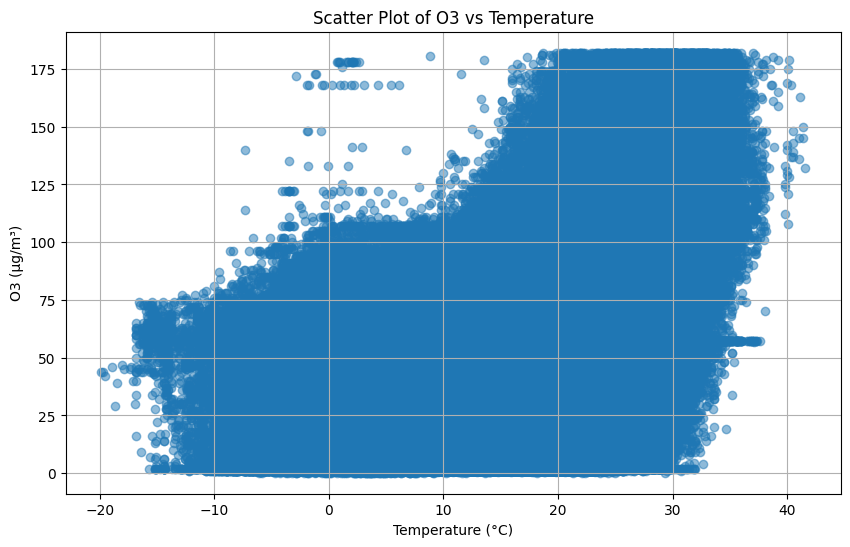

Korelasi antara suhu (TEMP) dan O3 adalah: 0.4949491226270666


In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(final_df['TEMP'], final_df['O3'], alpha=0.5)
plt.title('Scatter Plot of O3 vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('O3 (µg/m³)')
plt.grid(True)
plt.show()

correlation = final_df[['TEMP', 'O3']].corr().iloc[0, 1]
print(f'Korelasi antara suhu (TEMP) dan O3 adalah: {correlation}')

#### Pertanyaan 2:
Bagaimana tren bulanan dari tingkat polutan CO udara di setiap stasiun?

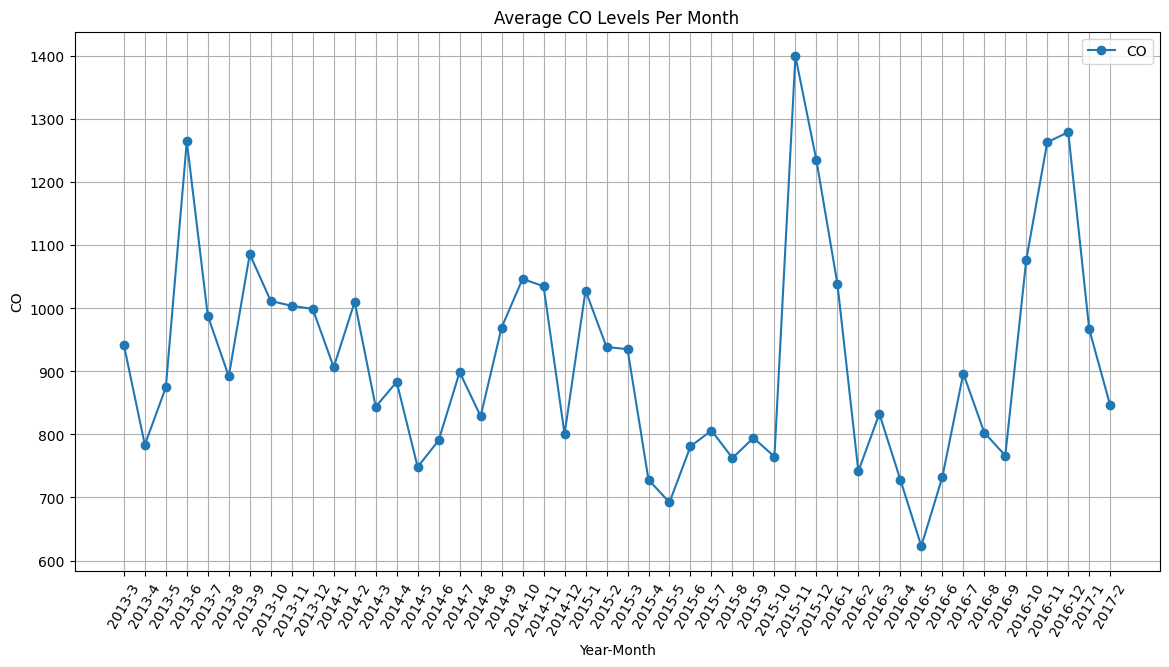

In [20]:
monthly_avg_CO = final_df.groupby(['year', 'month'])['CO'].mean().reset_index()

monthly_avg_CO['Year-Month'] = monthly_avg_CO['year'].astype(str) + '-' + monthly_avg_CO['month'].astype(str)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_CO['Year-Month'], monthly_avg_CO['CO'], label='CO', marker='o')
plt.title('Average CO Levels Per Month')
plt.xlabel('Year-Month')
plt.xticks(rotation=60)
plt.ylabel('CO')
plt.legend()
plt.grid(True)
plt.show()


**Insight:**
- Konsentrasi ozon (O3) menunjukkan kecenderungan untuk meningkat seiring dengan kenaikan suhu, terutama ketika suhu berada di atas 10°C. Hal ini menunjukkan adanya hubungan langsung antara suhu udara dan pembentukan ozon di atmosfer. Konsentrasi O3 yang tinggi pada suhu yang lebih panas dapat menjadi perhatian karena polutan ini berpotensi membahayakan kesehatan jika terakumulasi dalam jumlah berlebih.
- Tingkat CO mengalami fluktuasi yang cukup signifikan sepanjang periode pengamatan, dengan puncak terjadi pada bulan Desember 2012. Puncak yang muncul pada akhir tahun bisa terkait dengan perubahan aktivitas manusia atau kondisi cuaca yang berbeda selama bulan-bulan tersebut.

## Conclusion

- Penggabungan Data dari Berbagai Stasiun Pengamatan: Data kualitas udara dikumpulkan dari berbagai stasiun pengamatan, dan dilakukan penggabungan ke dalam satu dataset besar. Kolom yang tidak relevan seperti "No" dihapus untuk menyederhanakan analisis. Hal ini memungkinkan analisis yang lebih menyeluruh dan terfokus pada variabel penting seperti polutan dan faktor cuaca.
- Variabel Penting yang Dianalisis: Variabel yang dianalisis meliputi polutan udara seperti PM2.5, PM10, SO2, NO2, CO, O3, serta variabel cuaca seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), kecepatan angin (WSPM), dan curah hujan (RAIN). Ini memberikan pandangan komprehensif terhadap faktor-faktor yang memengaruhi kualitas udara di setiap stasiun.
- Hubungan Ozon dan Suhu: Salah satu pertanyaan utama dalam proyek ini adalah bagaimana hubungan antara tingkat ozon (O3) dengan perubahan suhu. Data yang terkumpul memberikan peluang untuk mengeksplorasi keterkaitan ini dan memetakan bagaimana variasi suhu mempengaruhi konsentrasi ozon di udara.
- Tren Bulanan Polutan CO: Analisis tren bulanan untuk karbon monoksida (CO) dilakukan untuk melihat pola polusi di setiap stasiun pengamatan. Tren ini dapat memberikan informasi tentang musim atau periode waktu di mana tingkat CO mengalami peningkatan atau penurunan signifikan.
- Peluang untuk Analisis Lebih Lanjut: Dengan adanya dataset yang kaya akan variabel, proyek ini memberikan peluang untuk analisis lebih lanjut, seperti mengidentifikasi pola polusi udara yang spesifik terhadap lokasi atau waktu, serta potensi dampak faktor cuaca lainnya terhadap konsentrasi polutan.